### 工作進度  
* 【置頂】**筆記內容架構**與**量化技術分析系統**相關資訊請參閱[251201筆記.ipynb](https://github.com/yilintung/StockInvestmentNotebook/blob/main/251201%E7%AD%86%E8%A8%98.ipynb)之「工作進度」。  
* 明年度第一季參與：平日夜間班課程  
  因為很多同學私訊提問，我把同學疑問統一整理，並對課程做了一點調整，專題課程增加，應用課程減少一些。(參考附圖)  
  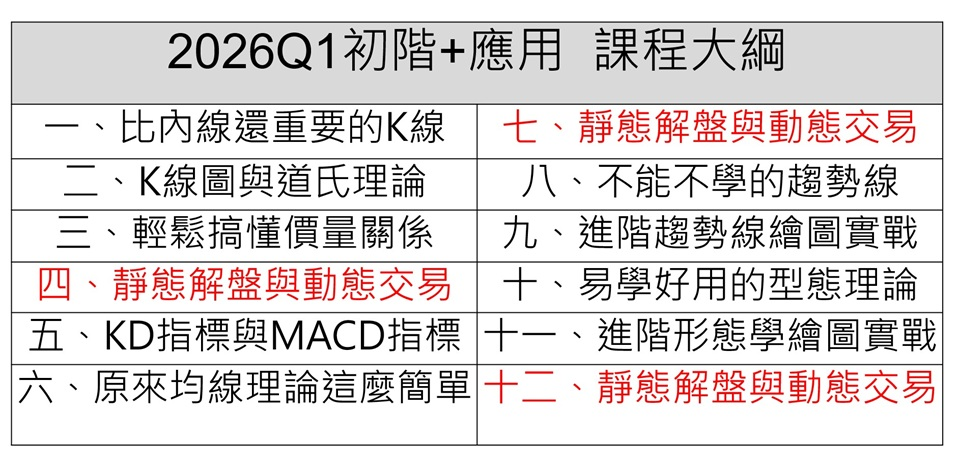  
  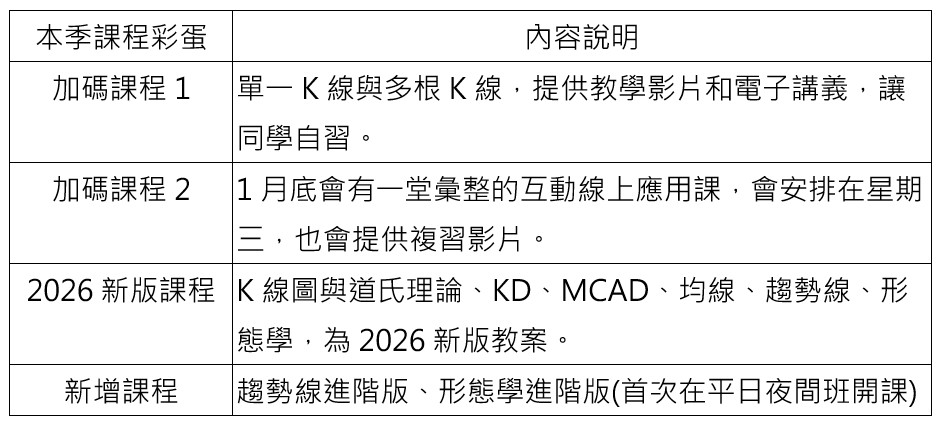  
  另外，本季與往年第一季課程的差異：  
  a.加碼課程1：單一K線與多根K線，提供教學影片和電子講義，讓同學自習。  
  b.加碼課程2：1月底會有一堂彙整的互動線上應用課，會安排在星期三，也會提供複習影片。  
  c.新版課程：K線圖與道氏理論、KD、MCAD、均線、趨勢線、形態學，為2026新版教案。  
  d.新增課程：趨勢線進階版、形態學進階版(首次在平日夜間班開課)  
  本季應該是歷年開課以來CP值最高的：新編講義×加碼課程×新增進階課程。
  - 新開資料夾：[03.上課講義與筆記](https://mega.nz/folder/DsADCLbJ#DukJhRiSHMYLSt2OKQygLg)  

* 引入模組與定義公用函式  

In [1]:
import numpy as np
import mysys
import markdown
from IPython.core.display import HTML

In [ ]:
def stock_analysis( analysis, stock_id, buttom_pattern = False) :
    results,images = analysis.analysis(stock_id)
    if buttom_pattern is True and '底部型態' in images :
        print('底型反轉交易策略：')
        display(images['底部型態'])
    print('解盤內容：')
    if '整體評價' in images :
        display(images['整體評價'])
    result_md   = results.to_markdown(tablefmt="grid")
    result_html = markdown.markdown(result_md, extensions=['markdown_grid_tables:GridTableExtension'])
    display(HTML(result_html))

* 更新量化技術分析資料庫  

In [ ]:
mysys.UpdatestockDatabase()

* 建立「解盤」物件    

In [ ]:
analysis = mysys.StockAnalysis()

### 大盤解盤  

* 加權指數  

> **開盤**：今天守穩就好，不需要有太大表現，2026再繼續加油。  
> 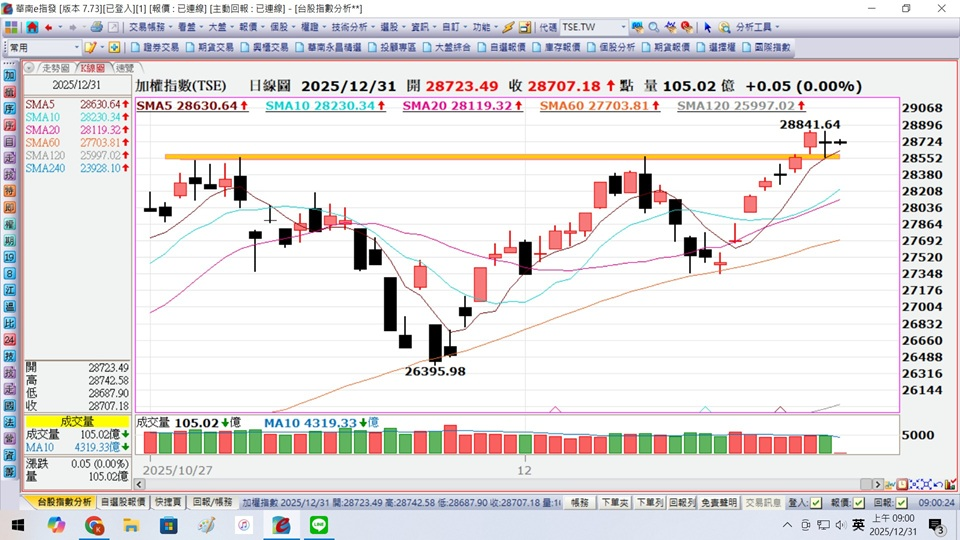  

In [8]:
# 支撐線
def line_drawing_callback( range_prices) :

    # 支撐線
    support_line_start_date = '2025-10-29'
    support_line_end_date   = range_prices.iloc[-1].name.strftime("%Y-%m-%d")
    support_line_price      = range_prices.loc['2025-12-26']['Close']
    
    seq_of_seq_of_points=[
        [(support_line_start_date,support_line_price),(support_line_end_date,support_line_price)]
    ]

    linewidths=[2.5]
    
    colors=['xkcd:orange yellow']

    return seq_of_seq_of_points,linewidths,colors

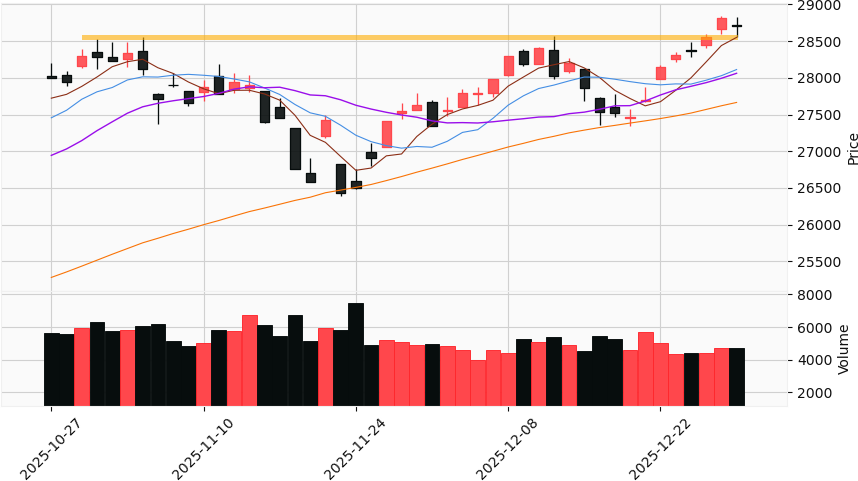

In [9]:
# 收盤：支撐線
image = mysys.DrawOnKlineChart('TAIEX','2025-10-27','2025-12-31',line_drawing_callback)
display(image)

> **盤後**：量化技術分析  

In [ ]:
# 盤後：加權指數解盤
stock_analysis(analysis,'TAIEX')

* 櫃買指數  

> **開盤**：櫃買指數穩健續漲。  
> 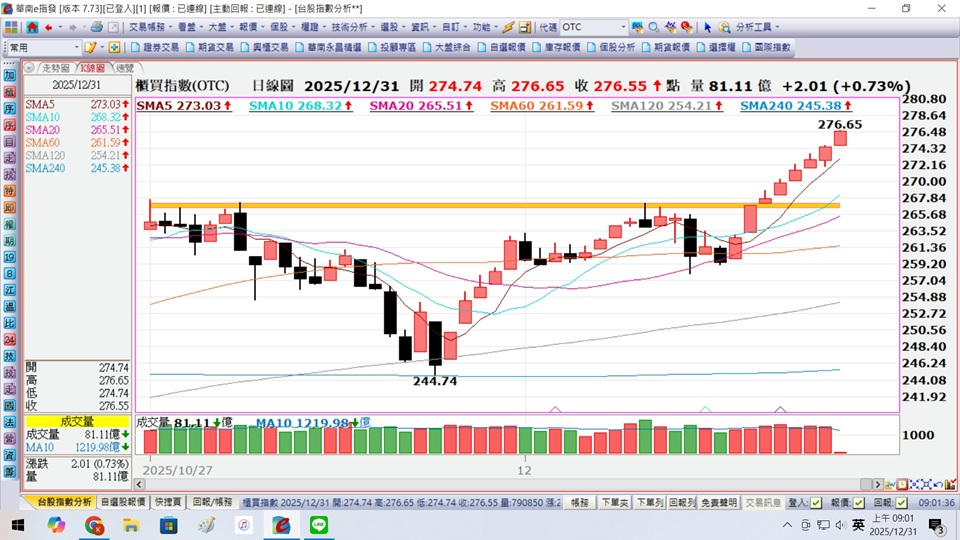  

In [12]:
# 支撐線
def line_drawing_callback( range_prices) :

    # 支撐線
    support_line_start_date = range_prices.iloc[0].name.strftime("%Y-%m-%d")
    support_line_end_date   = range_prices.iloc[-1].name.strftime("%Y-%m-%d")
    support_line_price      = range_prices.loc['2025-12-22']['Close']
    
    seq_of_seq_of_points=[
        [(support_line_start_date,support_line_price),(support_line_end_date,support_line_price)]
    ]

    linewidths=[2.5]
    
    colors=['xkcd:orange yellow']

    return seq_of_seq_of_points,linewidths,colors

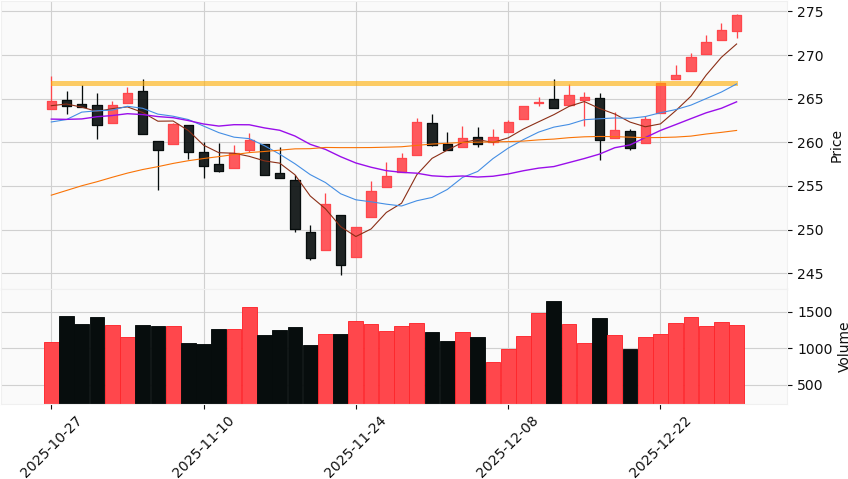

In [13]:
# 收盤：支撐線
image = mysys.DrawOnKlineChart('TPEx','2025-10-27','2025-12-31',line_drawing_callback)
display(image)

> **盤後**：量化技術分析  

In [ ]:
# 盤後：櫃買指數解盤
stock_analysis(analysis,'TPEx')

### 個股觀察  

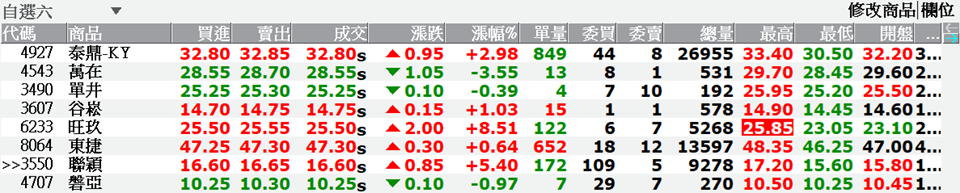  

* 福懋科(8131)  
  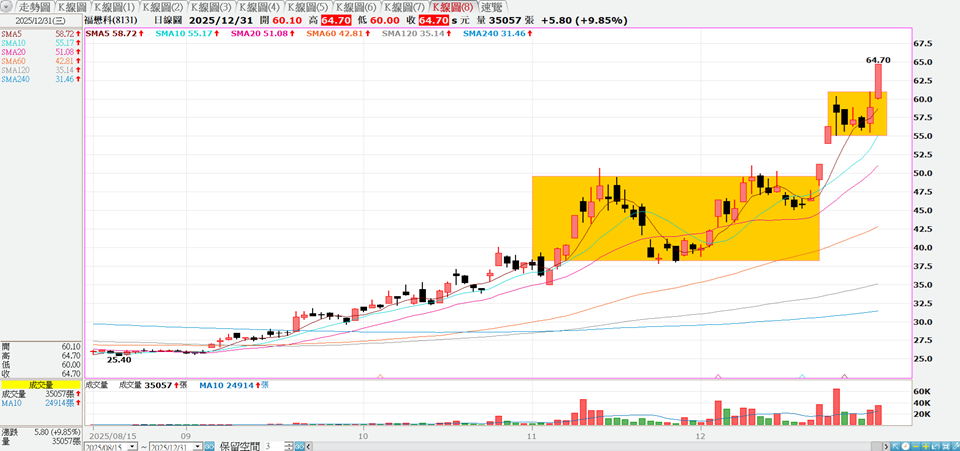  
* 華邦電(2344)  
  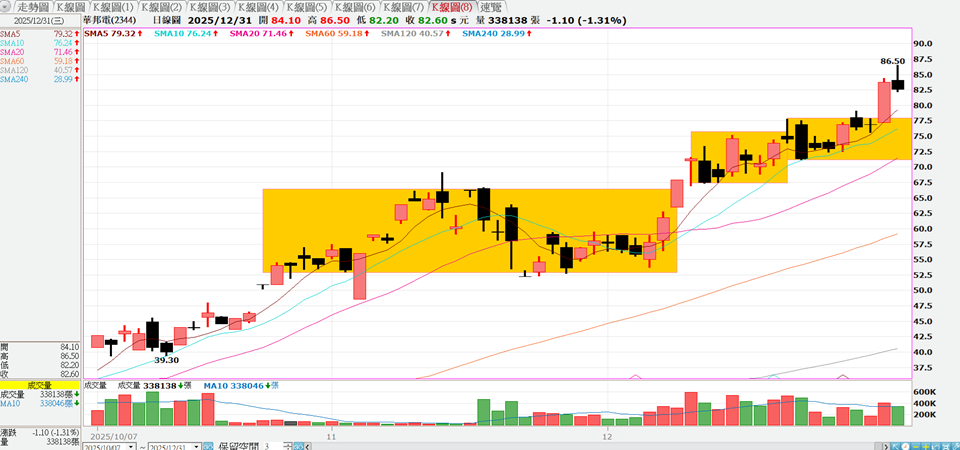  
* 科嶠(4542)  
  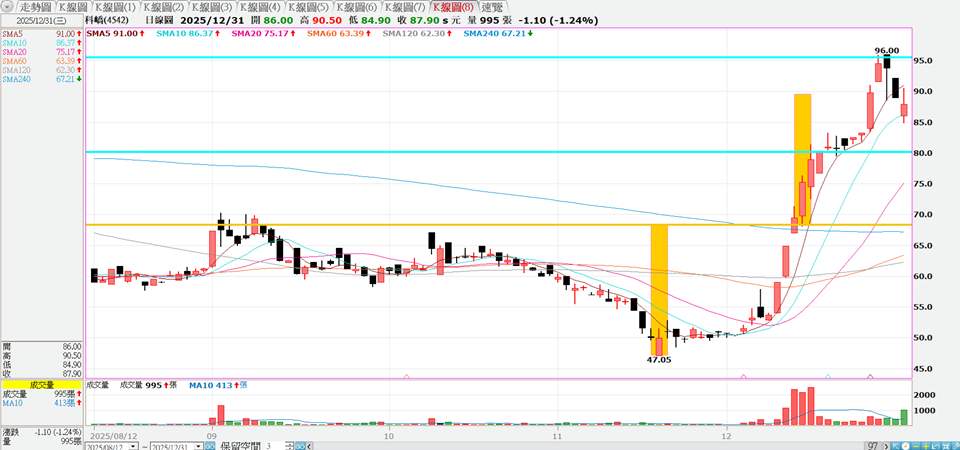  
* 怡利電(2497)  
  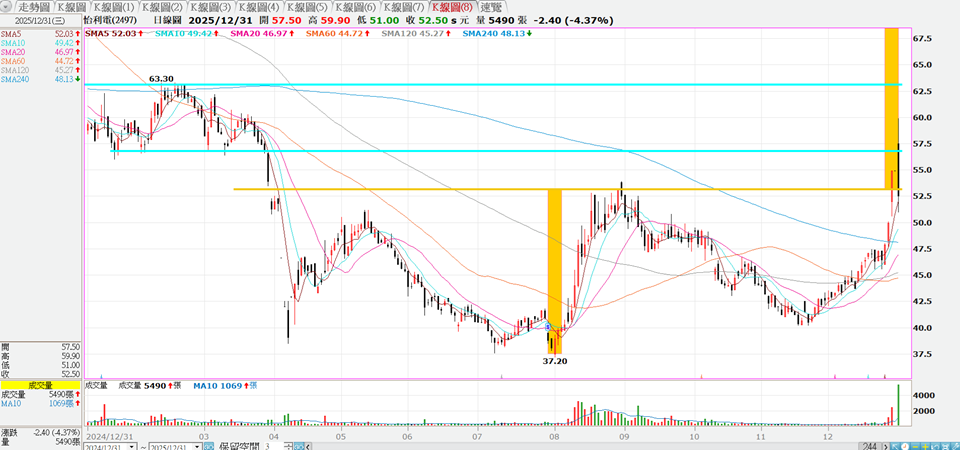  
* 三晃(1721)  
  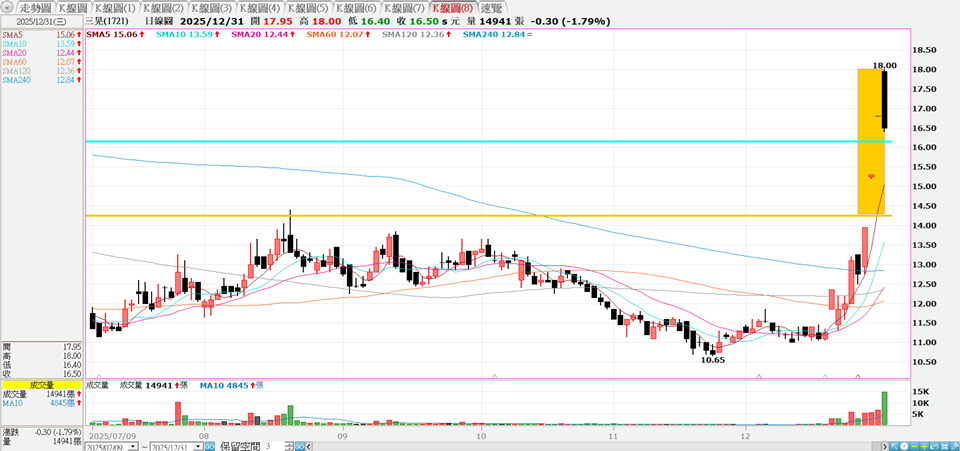  
* 利機(3444)  
  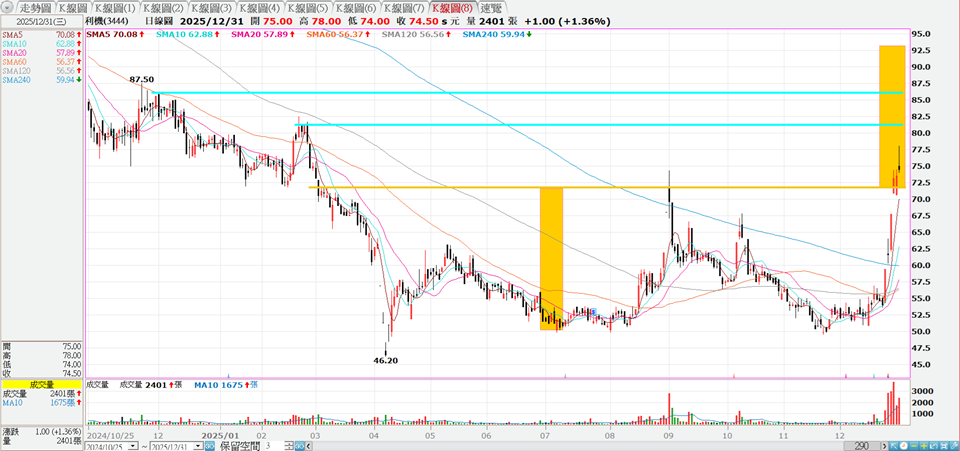  
* 東捷(8064)  
  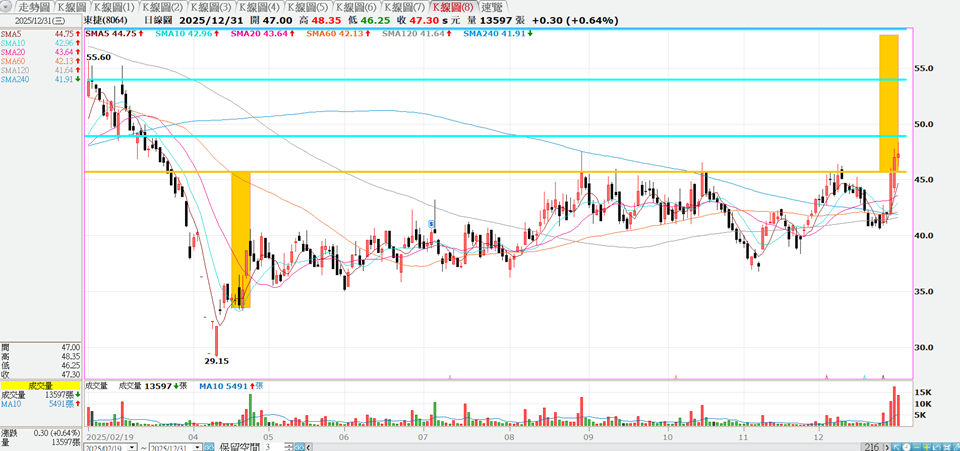  
* 聯穎(3550)  
  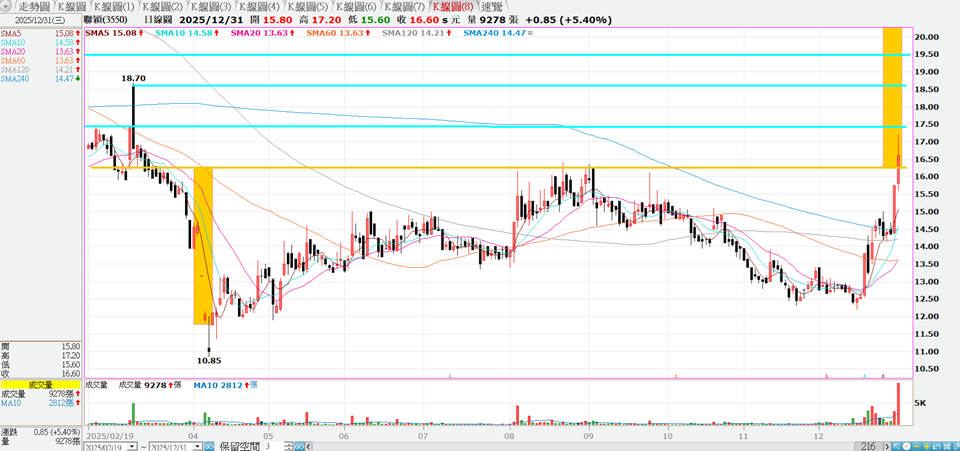  
* 聯電(2303)  
  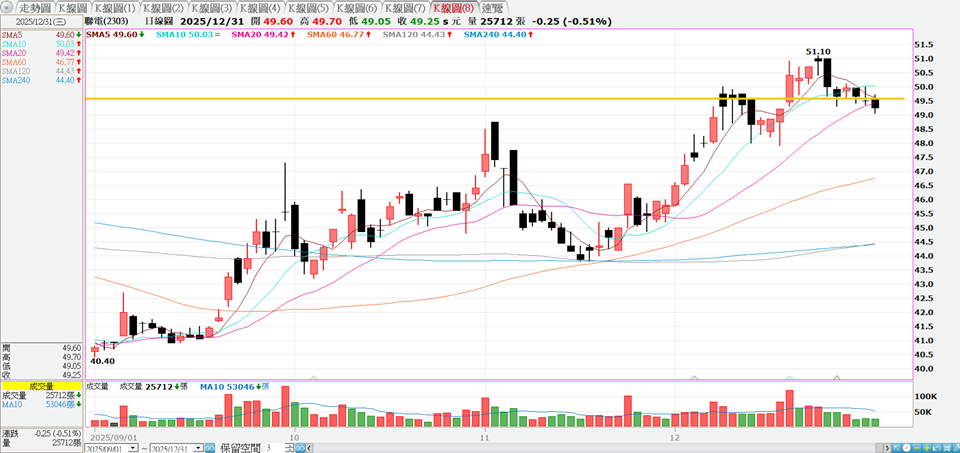  
* 泰鼎-KY(4927)  
  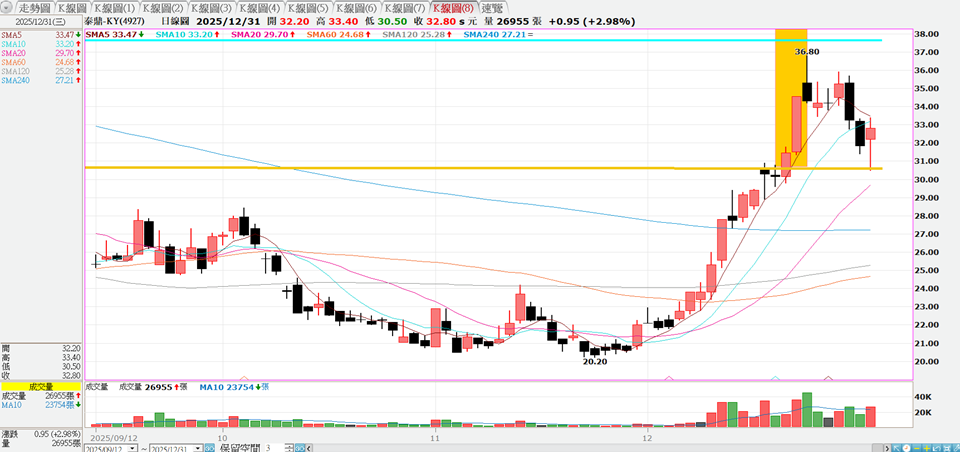  

### 個股解盤  

* 聯穎(3550)  
  看法：。    

> **盤後**：量化技術分析  

In [ ]:
stock_analysis(analysis,'3550')

> **盤後**：底部反轉交易策略分析  

In [14]:
def line_drawing_callback( range_prices) :
    # 設定頸線
    neckline_start_date = '2025-03-13'
    neckline_end_date   = range_prices.iloc[-1].name.strftime("%Y-%m-%d")
    neckline_price      = range_prices.loc['2025-09-02']['Open']

    # 設定底部日期與價格
    bottom_date  = '2025-04-10'
    bottom_price = range_prices.loc['2025-04-10']['Open']

    # 估算目標價
    target_price = (neckline_price - bottom_price) + neckline_price

    print('估算目標價為{:.2f}元'.format(target_price))

    # 設定突破日期
    breakout_date = '2025-12-31'
    
    seq_of_seq_of_points=[
        [(neckline_start_date,neckline_price),(neckline_end_date,neckline_price)],
        [(bottom_date,bottom_price),(bottom_date,neckline_price)],
        [(breakout_date,neckline_price),(breakout_date,target_price)]
    ]

    linewidths=[2.0,15.0,15.0]
    
    colors=['xkcd:orange yellow','xkcd:orange yellow','xkcd:orange yellow']

    return seq_of_seq_of_points,linewidths,colors

估算目標價為20.75元


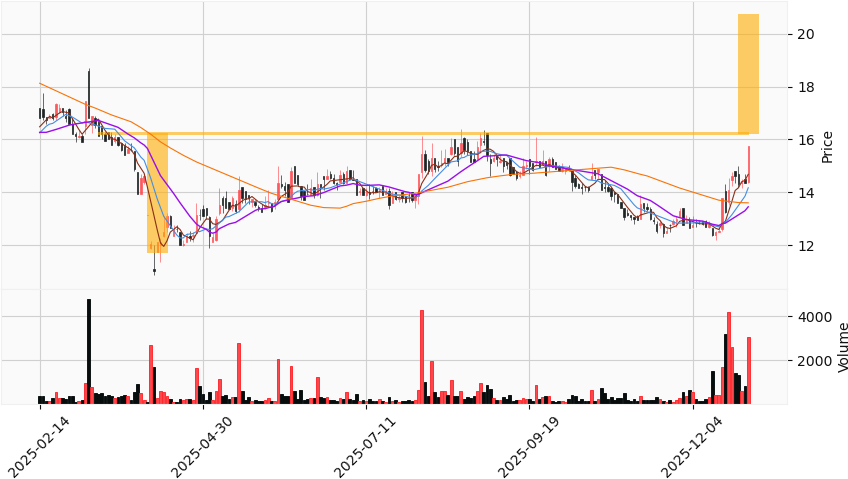

In [15]:
image = mysys.DrawOnKlineChart('3550','2025-02-14','2025-12-31',line_drawing_callback)
display(image)

籌碼面：  
法人○○( )：外資○○( )、投信○○( )、自營○○( )。  
主力○○( )。  
分公司買賣家數差○○( )。  
融資○○( )、融券○○( )。  